# Chapter 1

## Bayesian Inference

Modern Bayesian statistics is mostly performed using computer code. This has dramatically changed how Bayesian statistics was performed from even a few decades ago. The  complexity of models we can build has increased, and the barrier of necessary mathematical  and computational skills has been lowered.

Models are human-designed representations with very specific  goals in mind.

Building a model requires a combination of domain expertise and statistical skill to incorporate knowledge into some computable objectives and determine the usefulness of the result. Data is the raw material, and statistical distributions are the main mathematical tools to shape the statistical model. (Like a sculptor uses a chisel to shape a block of marble.)

Bayesian models, computational or otherwise, have two defining characteristics:
- Parameters: Unknown quantities are described using probability distributions 
- Bayes’ theorem: which is used to update the values of the parameters conditioned on the data. 

At a high-level we can describe the process of constructing Bayesian modeling in 3 iterative steps:
1. Designing a Model: Given some data and some assumptions on how this data could have been generated, we design a model by combining and transforming random variables.  
1. Process Inference: We use Bayes’ theorem to condition our models to the available data obtaining a posterior distribution. We hope the  data reduces the uncertainty for possible parameter values, though this is not a guaranteed of any Bayesian model.   
1. Model Evaluation: We criticize the model by checking whether the model makes sense according to different criteria, including the data and our expertise on the domain-knowledge.  Because we generally are uncertain about the models themselves, we sometimes  compare several models.  


Bayesian inference is a particular form of statistical inference based on combining  probability distributions in order to obtain other probability distributions. Bayes’ theorem  provides us with a general recipe to estimate the value of the parameter θ given that we  have observed some data Y: 

$$P(\theta|Y) = \frac{P(Y|\theta)P(\theta)}{P(Y)}$$

Where:
- $P(\theta|Y)$ is the posterior distribution of the parameter θ given the data Y
- $P(Y|\theta)$ is the likelihood of the data Y given the parameter θ
- $P(\theta)$ is the prior distribution of the parameter θ
- $P(Y)$ is the marginal likelihood of the data Y

RK = The log scale is preferred to perform calculations as computations are numerically more stable. 

As you can see evaluating the posterior at each specific point is conceptually simple, we  just need to multiply a prior times a likelihood. However, that is not enough to inform us  about the posterior, as we not only need the posterior probability at that specific point,  but also in relation to the surrounding points. This global information of the posterior  distribution is represented by the normalizing constant. Unfortunately, difficulties arise  from the need to compute the normalizing constant p(Y). 

RK = One nice feature of Bayesian statistics is that the posterior is (always) a distribution. This  fact allows us to make probabilistic statements about the parameters.

We just need  to remember that all these nice mathematical properties are only valid in the platonic world  of ideas where mathematical objects such as spheres, Gaussians and Markov chains exist.  As we move from mathematical purity into the applied math messiness of the real world  we must always keep in mind that our results are conditioned not only on the data but  also on the models. Consequently, bad data and/or bad models could lead to nonsensical  statements, even if they are mathematically consistent. We must always have a healthy  quota of skepticism about our data, models, and results.

Universal Inference Engines: numerical methods that allow us to approximate the posterior distribution. These methods are the workhorses of Bayesian statistics. The most widely and powerful methods are Markov Chain Monte Carlo Methods (known as samplers). An example of algorithm is the Metropolis-Hastings. (https://www.youtube.com/watch?v=yCv2N7wGDCw)

To make things more concrete let us try to solve the Beta-Binomial model. This is  probably the most common example in Bayesian statistics, and it is used to model binary,  mutually-exclusive outcomes such as 0 or 1, positive or negative, head or tails, spam or  ham, hotdog or not hotdog, healthy or unhealthy, etc. More often than not Beta-Binomial  model is used as the first example to introduce the basics of Bayesian statistics, because it  is a simple model that we can solve and compute with ease. In statistical notation we can  write the Beta-Binomial models as: 

$$\theta \sim Beta(α, β)$$ 
$$Y \sim Binomial(n=1, p=\theta)$$

Where:
- θ is the parameter of the model
- α and β are the hyperparameters of the prior distribution
- Y is the data


In [35]:
import numpy as np
from scipy import stats
import arviz as az

az.style.use("arviz-grayscale")

def post(θ, Y, α=1, β=1):
    if 0 <= θ <= 1:
        prior = stats.beta(α, β).pdf(θ)
        like  = stats.bernoulli(θ).pmf(Y).prod()
        prop = like * prior
    else:
        prop = -np.inf
    return prop
    

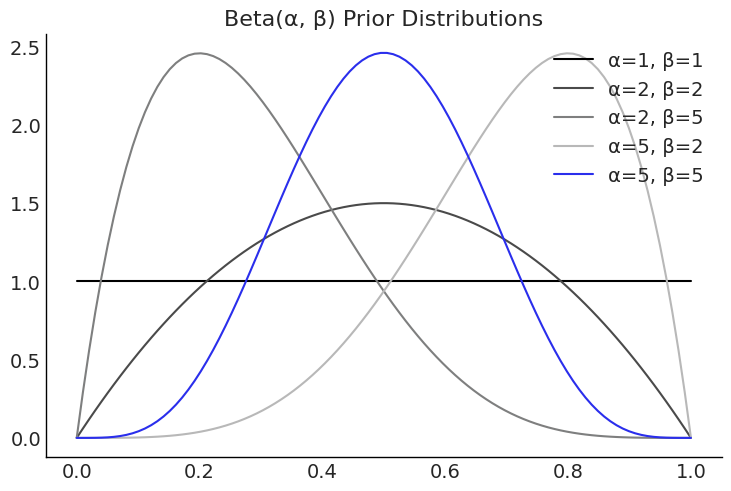

In [36]:
# create a plot of the prior distribution using beta distribution
import matplotlib.pyplot as plt

θ = np.linspace(0, 1, 100)

plt.plot(θ, stats.beta(1, 1).pdf(θ), label='α=1, β=1')
plt.plot(θ, stats.beta(2, 2).pdf(θ), label='α=2, β=2')
plt.plot(θ, stats.beta(2, 5).pdf(θ), label='α=2, β=5')
plt.plot(θ, stats.beta(5, 2).pdf(θ), label='α=5, β=2')
plt.plot(θ, stats.beta(5, 5).pdf(θ), label='α=5, β=5')
plt.legend()
plt.title('Beta(α, β) Prior Distributions')
plt.show()

In [37]:
Y = stats.bernoulli(0.7).rvs(20)

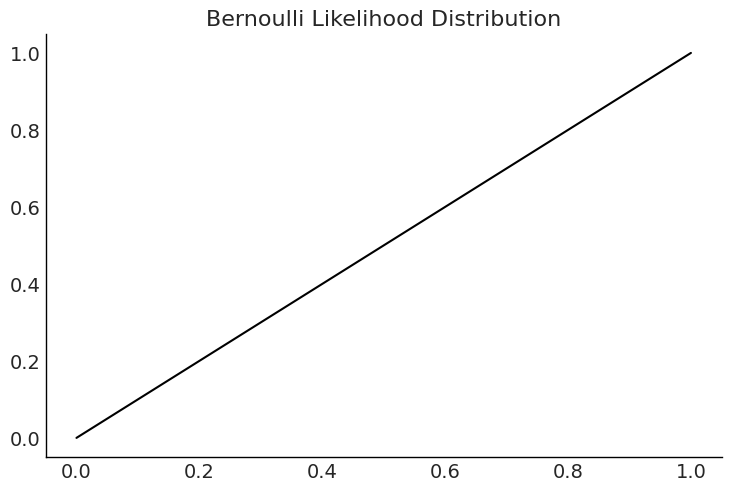

In [38]:
# create a plot of the likelihood distribution using bernoulli distribution
θ = np.linspace(0, 1, 100)

plt.plot(θ, stats.bernoulli(θ).pmf(1))
plt.title('Bernoulli Likelihood Distribution')
plt.show()

In [39]:
# count the number of heads
Y.sum()

15

In [40]:
# the .rvs method generates random numbers from the distribution 
stats.norm(0.5, 0.05).rvs(1) 

array([0.51824375])

In [41]:
# Metropolis-Hastings
n_iters = 1000
can_sd = 0.05
α = β = 1
θ = 0.5
trace = {'θ':np.zeros(n_iters)}
p2 = post(θ, Y, α, β)

for iter in range(n_iters):
    θ_can = stats.norm(θ, can_sd).rvs(1)
    p1 = post(θ_can, Y, α, β)
    pa = p1 / p2

    if pa > stats.uniform(0, 1).rvs(1):
        θ = θ_can
        p2 = p1

    trace['θ'][iter] = θ

Text(0, 0.5, 'θ')

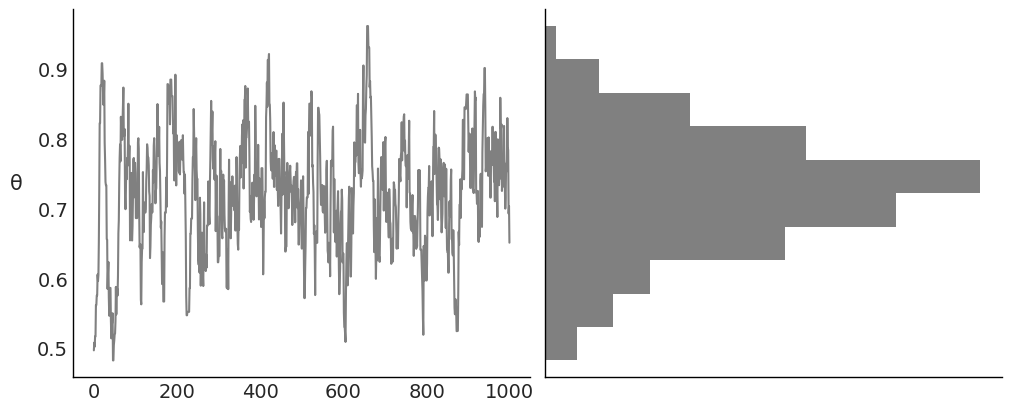

In [42]:
_, axes = plt.subplots(1,2, figsize=(10, 4), constrained_layout=True, sharey=True)
axes[1].hist(trace['θ'], color='0.5', orientation="horizontal", density=True)
axes[1].set_xticks([])
axes[0].plot(trace['θ'], '0.5')
axes[0].set_ylabel('θ', rotation=0, labelpad=15)

In [43]:
az.summary(trace, kind='stats', round_to=2)

,mean,sd,hdi_3%,hdi_97%
θ,0.72,0.08,0.56,0.89


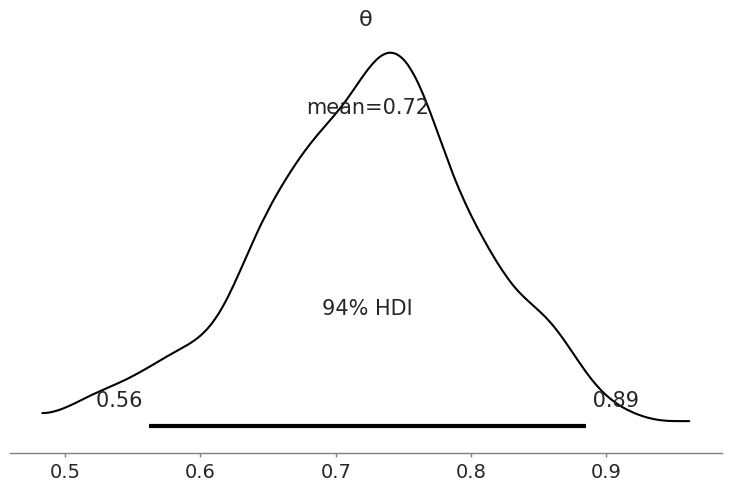

In [44]:
az.plot_posterior(trace)
plt.show()

In [45]:
import pymc3 as pm

# Declare a model in PyMC3
with pm.Model() as model:
    # Specify the prior distribution of unknown parameter
    θ = pm.Beta("θ", alpha=1, beta=1)

    # Specify the likelihood distribution and condition on the observed data
    y_obs = pm.Binomial("y_obs", n=1, p=θ, observed=Y)

    # Sample from the posterior distribution
    idata = pm.sample(1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 24 seconds.


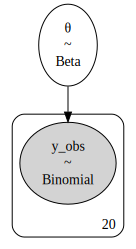

In [46]:
graphviz = pm.model_to_graphviz(model)
graphviz

In [47]:
# graphviz.graph_attr.update(dpi="300")
# graphviz.render("img/chp01/BetaBinomModelGraphViz", format="png")

In [48]:
pred_dists = (pm.sample_prior_predictive(1000, model)["y_obs"],
              pm.sample_posterior_predictive(idata, 1000, model)["y_obs"])

C:\Users\cg08900\Miniconda3\envs\pymc_3.9\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


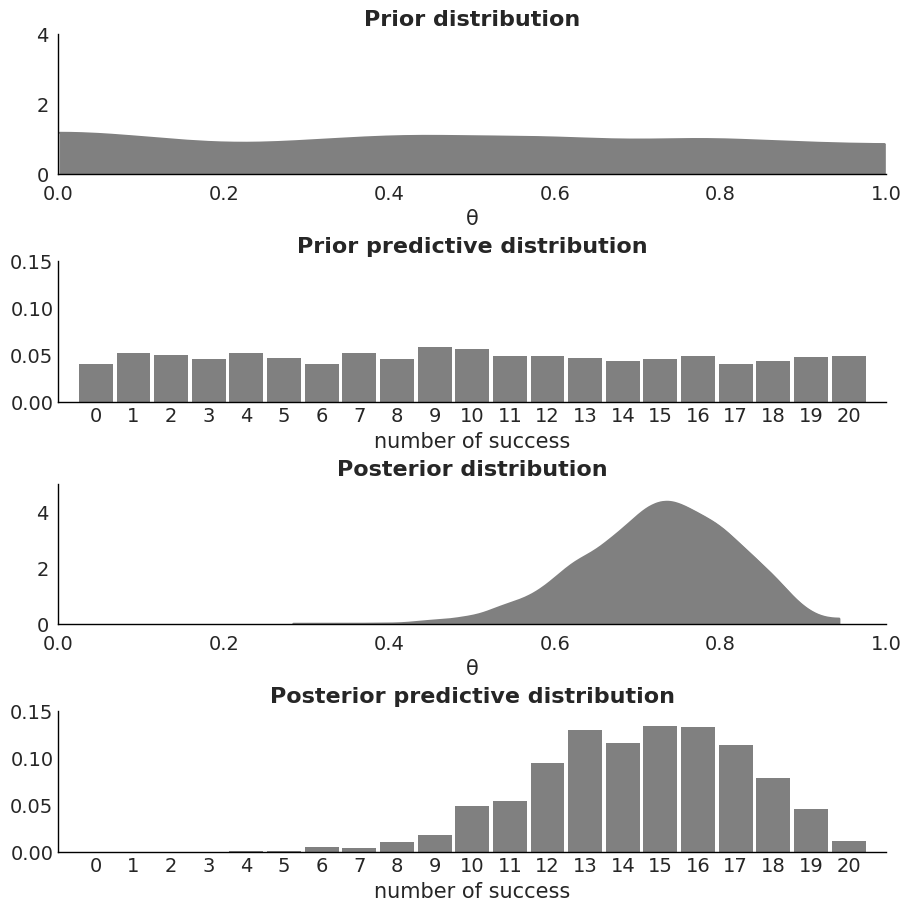

In [49]:
fig, axes = plt.subplots(4, 1, figsize=(9, 9))

for idx, n_d, dist in zip((1, 3), ("Prior", "Posterior"), pred_dists):
    az.plot_dist(dist.sum(1), hist_kwargs={"color":"0.5", "bins":range(0, 22)},
                                           ax=axes[idx])
    axes[idx].set_title(f"{n_d} predictive distribution",fontweight='bold')
    axes[idx].set_xlim(-1, 21)
    axes[idx].set_ylim(0, 0.15)
    axes[idx].set_xlabel("number of success")

az.plot_dist(θ.distribution.random(size=1000), plot_kwargs={"color":"0.5"},
             fill_kwargs={'alpha':1}, ax=axes[0])
axes[0].set_title("Prior distribution", fontweight='bold')
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 4)
axes[0].tick_params(axis='both', pad=7)
axes[0].set_xlabel("θ")

az.plot_dist(idata.posterior["θ"], plot_kwargs={"color":"0.5"},
             fill_kwargs={'alpha':1}, ax=axes[2])
axes[2].set_title("Posterior distribution", fontweight='bold')
axes[2].set_xlim(0, 1)
axes[2].set_ylim(0, 5)
axes[2].tick_params(axis='both', pad=7)
axes[2].set_xlabel("θ")

plt.show()

## Quantify your prior information

1. Conjugate Priors
1. Jeffreys' Prior
1. Maximum Entropy Priors
1. Weakly Informative Priors
1. Informative Priors

Asking what is the best-ever prior for a given problem, is a common and totally valid question. But it is difficult to give a straight satisfying answer other than, there is no such thing. At best there are some useful defaults that we can use as starting points in an iterative modeling workflow.  

A prior is conjugate to a likelihood if the posterior belongs to the same family of distributions as the prior. For example, if the likelihood is Poisson and the prior Gamma, then the posterior will also be a Gamma distribution. From a purely mathematical perspective, conjugate priors are the most convenient  choice as they allow us to calculate the posterior distribution analytically with “pen and  paper”, no complex computation required.

The mean of the Beta distribution is given by the formula:
$$E[θ] = \frac{α}{α + β}$$

The posterior mean is:
$$E[θ|Y] = \frac{α + y}{α + β + n}$$

The posterior mode is often called the maximum a posteriori (MAP) value.

A prior Beta(1, 1) is equivalent to having two trials with 1 success and 1  failure. Conceptually, the shape of the Beta distribution is controlled by parameter α and  β, the observed data updates the prior so that it shifts the shape of the Beta distribution  closer and more narrowly to the majority of observations.

In the absence of prior information, it sounds reasonable to follow the principle of indifference also known as the principle of insufficient reason. This principle basically says that if  you do not have information about a problem then you do not have any reason to believe  one outcome is more likely than any other. In the context of Bayesian statistics this principle has motivated the study and use of objective priors. These are systematic ways of  generating priors that have the least possible influence on a given analysis.

Of course this does not remove other sources of subjectivity such as the choice  of the likelihood, the data selection process, the choice of the problem being modeled or  investigated, and a long et cetera.

Jeffreys' prior are often referred as non-informative priors. They are invariant under reparameterization and are defined as the square root of the Fisher information matrix. 

Yet another way to justify a choice of priors is to pick the prior with the highest entropy. In order to obtain a maximum entropy prior we need to solve an optimization problem  taking into account a set of constraints. Mathematically this can be done using what is  known as Lagrangian multipliers.

The distributions with the largest entropy under the following constraints are 19:  
* No constraints: **Uniform** (continuous or discrete, according to the type of variable)  
* A positive mean, with support [0, ∞): **Exponential**  
* An absolute value mean, with support (−∞, ∞): **Laplace** (also known as double  Exponential)  
* A given mean and variance, with support (−∞, ∞): **Normal distribution**  
* A given mean and variance, with support [−π, π]: **Von Mises**  
* Only two unordered outcomes and a constant mean: **Binomial**, or the **Poisson** if we have rare events (the Poisson can be seen as a special case of the binomial) 

But in this book we will not rely too much on these kinds of priors. We believe prior  elicitation (as other modeling decisions) should be context dependent, meaning that details  from specific problems and even idiosyncrasies of a given scientific field could inform our  choice of priors. While MaxEnt priors can incorporate some of these restrictions it is possible  to move a little bit closer to the informative end of the informativeness prior spectrum. We  can do this with so called weakly informative priors. 


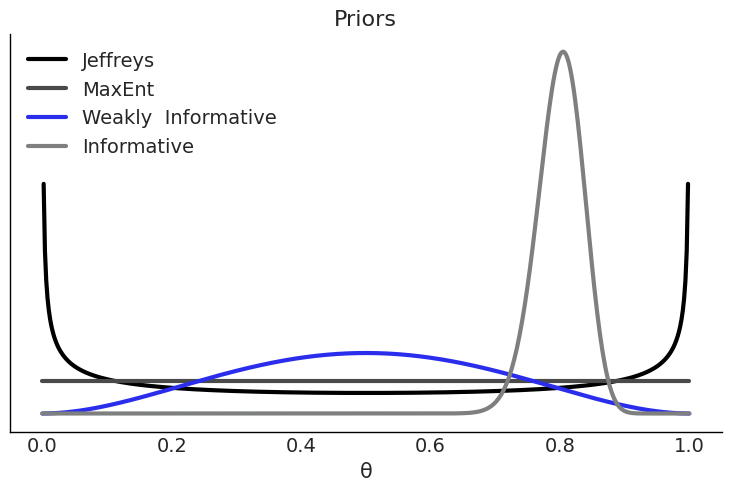

In [50]:
x = np.linspace(0, 1, 500)
params = [(0.5, 0.5), (1, 1), (3,3), (100, 25)]

labels = ["Jeffreys", "MaxEnt", "Weakly  Informative",
          "Informative"]

_, ax = plt.subplots()
for (α, β), label, c in zip(params, labels, (0, 1, 4, 2)):
    pdf = stats.beta.pdf(x, α, β)
    ax.plot(x, pdf, label=f"{label}", c=f"C{c}", lw=3)
    ax.set(yticks=[], xlabel="θ", title="Priors")
    ax.legend()